Keys of the iris dataset:
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Feature names:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Target names (labels):
 ['setosa' 'versicolor' 'virginica']

Shape of the data (samples, features): (150, 4)
Shape of the target: (150,)


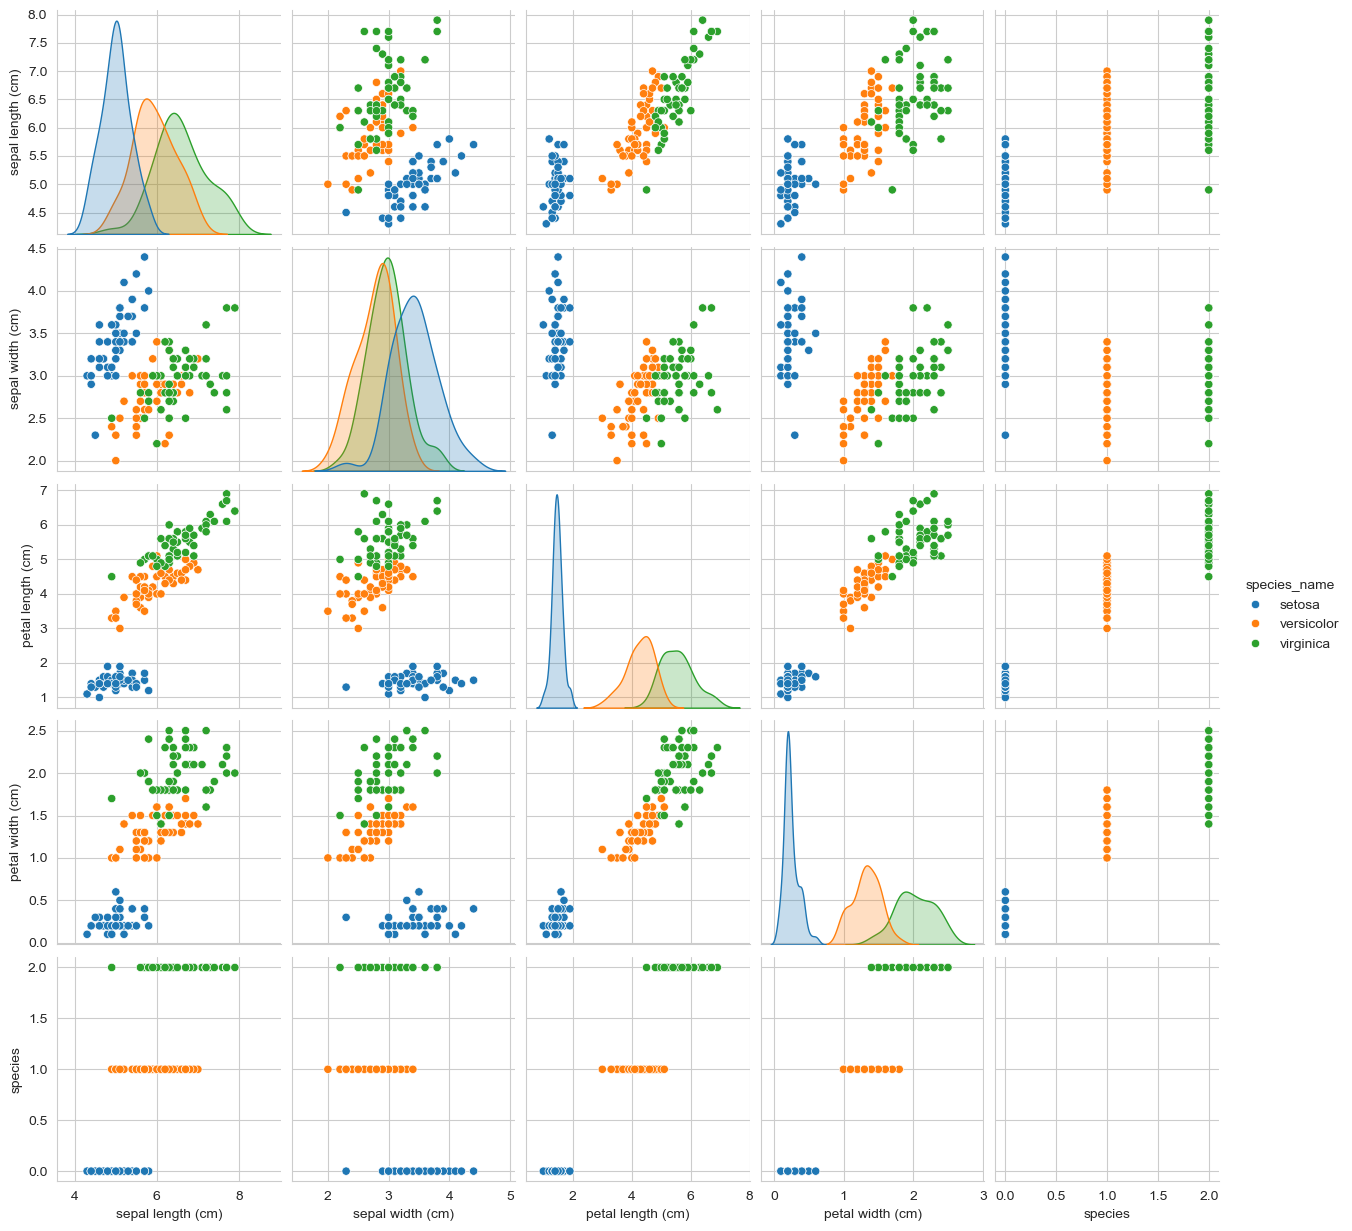

Training features shape: (120, 4)
Testing features shape: (30, 4)
Training target shape: (120,)
Testing target shape: (30,)
Accuracy on training data: 0.958
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30


Confusion Matrix


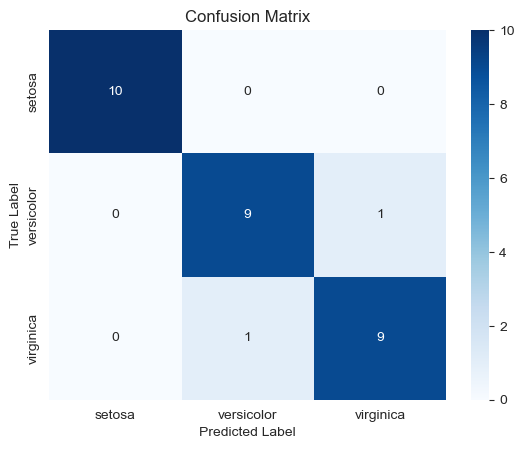

In [22]:
# Fundamental libraries for data handling and computation
import numpy as np
import pandas as pd

# Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns  # Built on matplotlib, provides prettier and easier plots

# Machine Learning specific libraries
from sklearn import datasets  # To load the Iris dataset
from sklearn.model_selection import train_test_split  # To split data into train/test sets
from sklearn.preprocessing import StandardScaler  # To standardize our features
from sklearn.linear_model import LogisticRegression # The model we will use
from sklearn import metrics  # To evaluate our model's performance

# Magic command to make plots appear in the notebook
%matplotlib inline

# Optional: Set a style for plots
sns.set_style("whitegrid")

# Load the dataset
iris = datasets.load_iris()

# Let's see what's inside this object
print("Keys of the iris dataset:\n", iris.keys())
print("\nFeature names:\n", iris.feature_names)
print("\nTarget names (labels):\n", iris.target_names)
print("\nShape of the data (samples, features):", iris.data.shape)
print("Shape of the target:", iris.target.shape)

#EDA is crucial to understand the data you're working with. We'll convert the data into a Pandas DataFrame for easier analysis.
# Create a DataFrame for the features
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# Add the target column (the species) and give it a meaningful name
df['species'] = iris.target
# Map the target numbers to their actual names for easier plotting
df['species_name'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Display the first 5 rows of the DataFrame
df.head()


# Get a quick statistical summary of the numerical features
df.describe()

# Check how many samples we have for each species
df['species_name'].value_counts()

#Visualizations help us see relationships between features.
# Create a pairplot to see relationships between all features, colored by species
sns.pairplot(df, hue='species_name', height=2.5)
plt.show()

# Define features (X) and label (y)
# We use the original numerical target (0, 1, 2) for the model, not the text names.
X = df[iris.feature_names]  # Alternatively: X = iris.data
y = df['species']           # Alternatively: y = iris.target

# Split the dataset into a training set (80%) and a test set (20%)
# - random_state ensures you get the same split every time you run the code (useful for reproducibility)
# - stratify=y ensures the train and test sets have the same proportion of classes as the original dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

#Many ML algorithms perform better when features are on a similar scale. Standardization subtracts the mean and divides by the standard deviation.
#Initialize the scaler
scaler = StandardScaler()

#Fit the scaler on the TRAINING data and transform it
X_train_scaled = scaler.fit_transform(X_train)

#Transform the test data using the scaler fitted on the training data
#IMPORTANT; we do not fit on the test data to avoid data leakage
X_test_scaled = scaler.transform(X_test)

#Initialize the model
model = LogisticRegression(random_state=42)

#Train the model using the scaled TRAINING data
model.fit(X_train_scaled, y_train)

#Let's see the model's accuracy on the training data itself
train_accuracy = model.score(X_train_scaled, y_train)
print(f"Accuracy on training data: {train_accuracy:.3f}")

#The true test of the model is its performance on unseen data

#Use the trained model to make predictions on the scaled TEST data
y_pred = model.predict(X_test_scaled)

#Calculate the accuracy on the test set 
test_accuracy = metrics.accuracy_score(y_test,y_pred)
print(metrics.classification_report(y_test, y_pred, target_names=iris.target_names))

#Let's get a more detailed report
print("\nClassification Report:")
print(metrics.classification_report(y_test, y_pred, target_names=iris.target_names))

#Create a confusion matrix to see which classes were confused
print("\nConfusion Matrix")
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

#Let's plot it nicely
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, 
           yticklabels=iris.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()





